In [1]:
# The perpuse of this notebook is to visually show that the new features added to athena, 
# namely the sub set graph building fucntionality, works appropriately. 

# Note: this notebook should be run in an environment where the pubilicly available athena version of the package is not installed. 
# Needles to say all of the other dependencies described in the requirements.txt and dev_requirements.txt should be avilable.

import os
import sys
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
import seaborn as sns

In [2]:
# Add path to the ATHENA beta repository
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
# Import Local package
import athena as ath

In [4]:
# Loead data
so = ath.dataset.imc()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [5]:
# Define sample
spl = 'slide_49_By2x5'

In [6]:
# Extrac centroids
ath.pp.extract_centroids(so, spl, mask_key='cellmasks')

In [7]:
# import default graph builder parameters and build grahs using ALL NODES
from athena.graph_builder.constants import GRAPH_BUILDER_DEFAULT_PARAMS

# kNN graph
config = GRAPH_BUILDER_DEFAULT_PARAMS['knn']
config['builder_params']['n_neighbors'] = 6 # set parameter k
ath.graph.build_graph(so, spl, builder_type='knn', mask_key='cellmasks', config=config)

# radius graph
config = GRAPH_BUILDER_DEFAULT_PARAMS['radius']
config['builder_params']['radius'] = 20 # set radius
ath.graph.build_graph(so, spl, builder_type='radius', mask_key='cellmasks', config=config)

# contact graph - this takes some time
ath.graph.build_graph(so, spl, builder_type='contact', mask_key='cellmasks')

# the results are saved back into `.G`:
so.G[spl]

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 1541/1541 [00:24<00:00, 64.09it/s]


{'contact': <networkx.classes.graph.Graph at 0x7f8c21891160>,
 'knn': <networkx.classes.graph.Graph at 0x7f8c21878520>,
 'radius': <networkx.classes.graph.Graph at 0x7f8c21888340>}

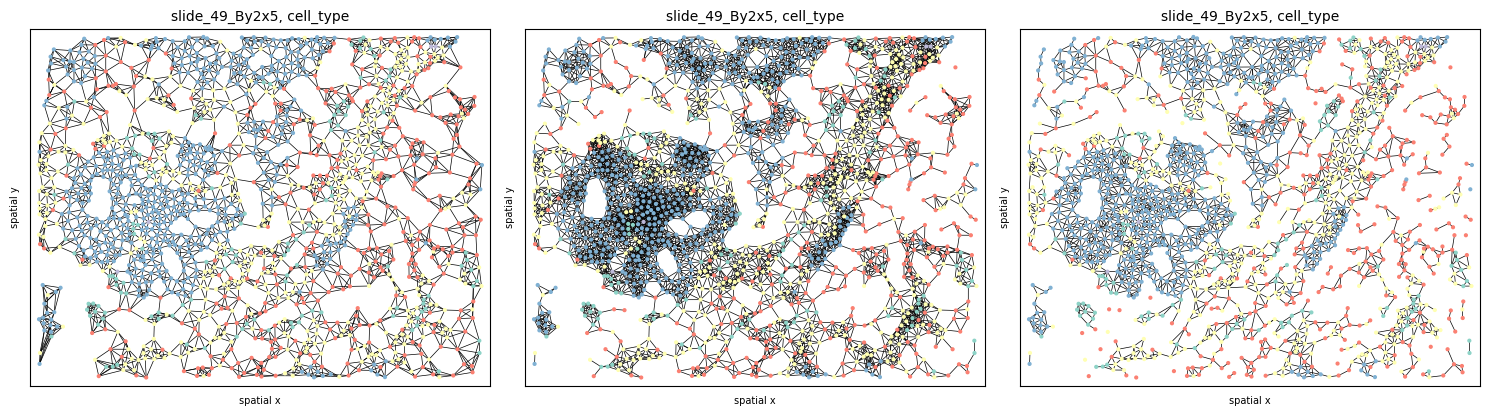

In [8]:
# Viuslaize full-graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 6), dpi=100)
ath.pl.spatial(so, spl, 'cell_type', edges=True, graph_key='knn', ax=axs.flat[0], cbar=False)
ath.pl.spatial(so, spl, 'cell_type', edges=True, graph_key='radius', ax=axs.flat[1], cbar=False)
ath.pl.spatial(so, spl, 'cell_type', edges=True, graph_key='contact', ax=axs.flat[2], cbar=False)

In [9]:
# Build subset graphs
# kNN graph
config = GRAPH_BUILDER_DEFAULT_PARAMS['knn']
config['builder_params']['n_neighbors'] = 6 # set parameter k
ath.graph.build_graph(so, spl, builder_type='knn', mask_key='cellmasks', config=config,
                      col_name = "cell_type",
                      types = ['tumor','immune','endothelial'])

# radius graph
config = GRAPH_BUILDER_DEFAULT_PARAMS['radius']
config['builder_params']['radius'] = 20 # set radius
ath.graph.build_graph(so, spl, builder_type='radius', mask_key='cellmasks', config=config,
                      col_name = "cell_type",
                      types = ['tumor','immune','endothelial'])

# contact graph - this takes some time
ath.graph.build_graph(so, spl, builder_type='contact', mask_key='cellmasks',
                      col_name = "cell_type",
                      types = ['tumor','immune','endothelial'])

# the results are saved back into `.G`:
so.G[spl]

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 1158/1158 [00:18<00:00, 62.63it/s]


{'contact': <networkx.classes.graph.Graph at 0x7f8c21891160>,
 'knn': <networkx.classes.graph.Graph at 0x7f8c21878520>,
 'radius': <networkx.classes.graph.Graph at 0x7f8c21888340>,
 "knn > cell_type > ['tumor', 'immune', 'endothelial']": <networkx.classes.graph.Graph at 0x7f8d723442b0>,
 "radius > cell_type > ['tumor', 'immune', 'endothelial']": <networkx.classes.graph.Graph at 0x7f8d7233b400>,
 "contact > cell_type > ['tumor', 'immune', 'endothelial']": <networkx.classes.graph.Graph at 0x7f8d72211310>}

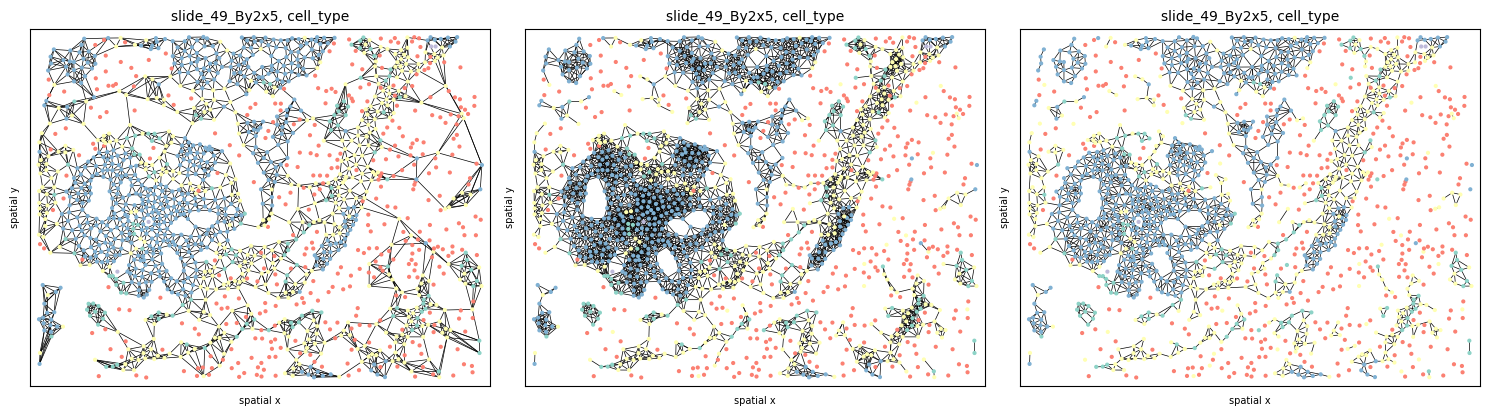

In [10]:
# Viuslaize subset-graphs
fig, axs = plt.subplots(1, 3, figsize=(15, 6), dpi=100)
ath.pl.spatial(so, spl, 'cell_type', edges=True, graph_key="knn > cell_type > ['tumor', 'immune', 'endothelial']", ax=axs.flat[0], cbar=False)
ath.pl.spatial(so, spl, 'cell_type', edges=True, graph_key="radius > cell_type > ['tumor', 'immune', 'endothelial']", ax=axs.flat[1], cbar=False)
ath.pl.spatial(so, spl, 'cell_type', edges=True, graph_key="contact > cell_type > ['tumor', 'immune', 'endothelial']", ax=axs.flat[2], cbar=False)

In [11]:
# As we can see the program seems to be working correctly. 